In [86]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [87]:
# Paths for two training images
train_image_paths = [
    r"image.png",  # Image 1 path
    r"image2.png"   # Image 2 path
]

# Define labels manually (Example: 0 and 1)
y_train = np.array([0, 1])  # Change labels as needed

# Resize settings (Ensure both images have the same size)
img_size = (375, 299)  # Image input size

# Load, preprocess, and store both images
x_train = []
for path in train_image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to load image at {path}")

    img = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    x_train.append(img)

# Convert list to numpy array
x_train = np.array(x_train)  # Shape: (2, 375, 299, 1)


In [88]:
# Define CNN Model
model = keras.Sequential([
    keras.Input(shape=(375, 299, 1)),  # Input layer
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  # 2 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [100]:
# Train the model
model.fit(x_train, y_train, epochs=10)

# Save the trained model
model.save('two_image_model.h5')

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6902
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 0.5000 - loss: 10.4713
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - accuracy: 1.0000 - loss: 0.1156
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - accuracy: 0.5000 - loss: 1.9766
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - accuracy: 1.0000 - loss: 0.3636
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step - accuracy: 0.5000 - loss: 0.8586
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step - accuracy: 0.5000 - loss: 0.6999
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - accuracy: 1.0000 - loss: 0.1407
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step - accuracy: 0.5000 - loss: 0.3806
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - accuracy: 1.0000 - loss: 0.1706


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


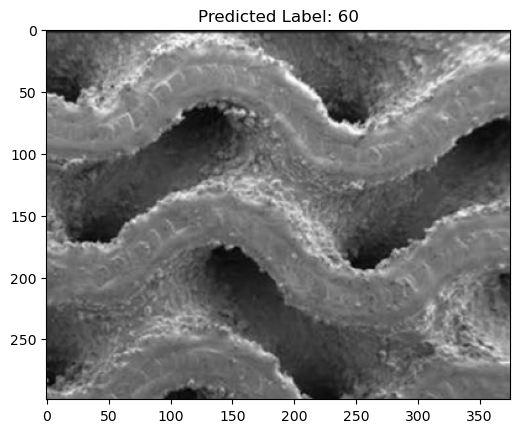

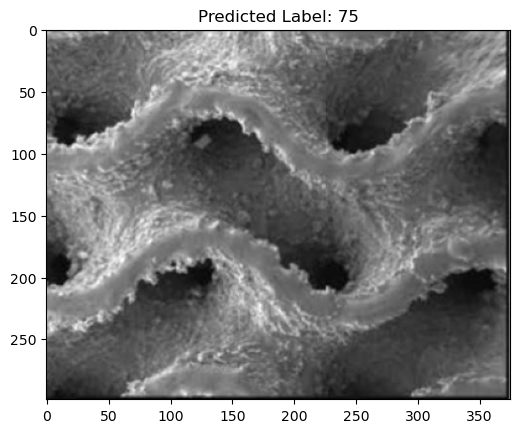

In [108]:
def porosity(num):
    if num == 1:
        return 75
    else:
        return 60

# Load model for testing
model = tf.keras.models.load_model('two_image_model.h5')

# Predict on the same images
predictions = model.predict(x_train)
predicted_labels = np.argmax(predictions, axis=1)

# Display both images with predictions
for i in range(2):
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Predicted Label: {porosity(predicted_labels[i])}')
    plt.show()